In [1]:
from __future__ import print_function

%matplotlib inline


import numpy as np
import pysptools.util as util
import pysptools.eea as eea
import pysptools.abundance_maps as amp
import os
import os.path as osp
import spectral.io.envi as envi
import matplotlib.pyplot as plt
import pysptools.classification as cls
from spectral import *

import pysptools.material_count as cnt
import pysptools.spectro as spectro
import scipy
import scipy.io

# Endmember Extraction Algorithms \& Abundance Map

In [5]:
def get_endmembers_NFINDR(data):
    print('Endmembers extraction with NFINDR')
    nfindr = eea.NFINDR()
    U = nfindr.extract(data, 7, maxit=10, normalize=False, ATGP_init=True)
    # 7 is the EM we want to find

    nfindr.display() # suffix='Forest-Original')
    # return an array of endmembers
    return U

In [6]:
def get_endmembers_ATGP(data):
    print('Endmembers extraction with ATGP')
    atgp = eea.ATGP()
    U = atgp.extract(data, 7, normalize=False)
    # 7 is the EM we want to find

    atgp.display() # display(suffix='Forest-Original')
    # return an array of endmembers
    return U

In [7]:
def get_endmembers_FIPPI(data):
    print('Endmembers extraction with FIPPI')
    fippi = eea.FIPPI()
    U = fippi.extract(data, 5, normalize=True)
    # 7 is the EM we want to find

    fippi.display() # (suffix='Forest-Original')
    # return an array of endmembers
    return U

In [8]:
def gen_abundance_maps(data, U):
    print('Abundance maps generation with NNLS')
    nnls = amp.NNLS()
    amaps = nnls.map(data, U, normalize=True)
    nnls.display(colorMap='jet', columns=7) #, suffix='Forest Abundance Map using NFINDR Result')
    # return a cube of abundance maps
    return amaps

# Read Original dataset

In [9]:
r1_reg = scipy.io.loadmat('r1_reg.mat')
r1_reg = r1_reg['r1_reg']

mnf_den = scipy.io.loadmat('mnf_den.mat')
mnf_den = mnf_den['mnf_den']

ica_den = scipy.io.loadmat('ica_den.mat')
ica_den = ica_den['ica_den']

# Endmembers from Original dataset

Endmembers extraction with ATGP


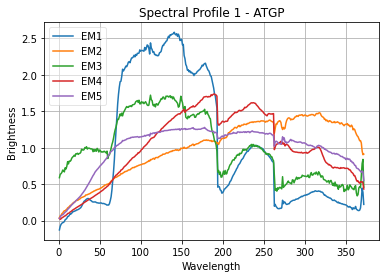

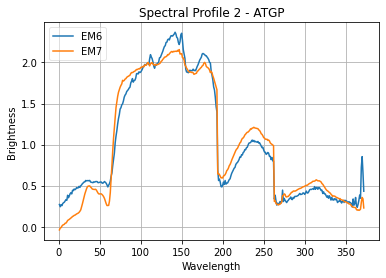

Abundance maps generation with NNLS


/Users/ckn/opt/anaconda3/lib/python3.8/site-packages/pysptools/abundance_maps/amaps_int.py:127: UserWarning: In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns
  warnings.warn('In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns')


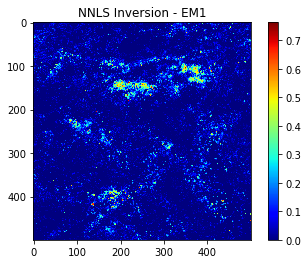

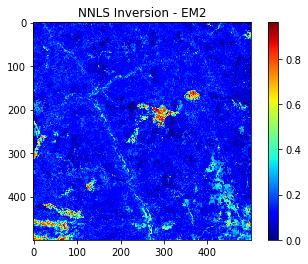

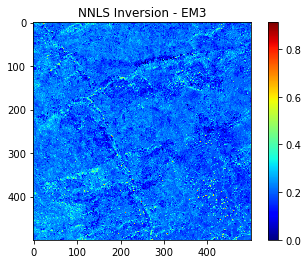

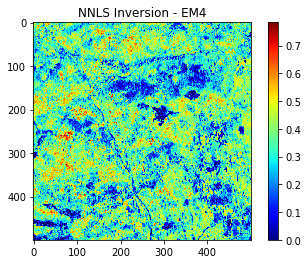

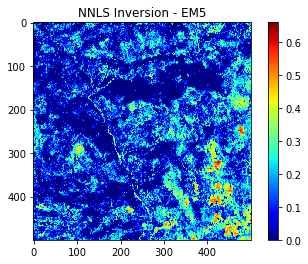

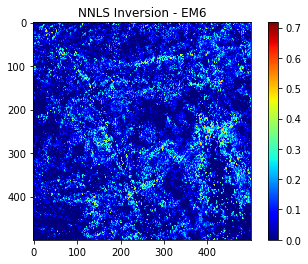

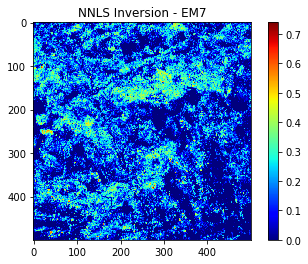

<Figure size 432x288 with 0 Axes>

In [13]:
# ATGP
ori_atgp, a_ori = get_endmembers_ATGP(r1_reg)
oa_am = gen_abundance_maps(r1_reg, ori_atgp)
ori_atgp = {"ori_atgp": ori_atgp}
scipy.io.savemat("ori_atgp.mat", ori_atgp)

Endmembers extraction with NFINDR


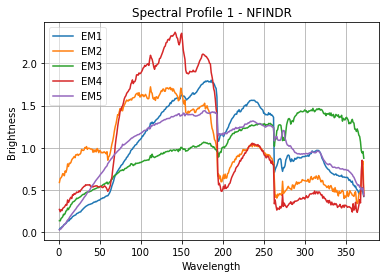

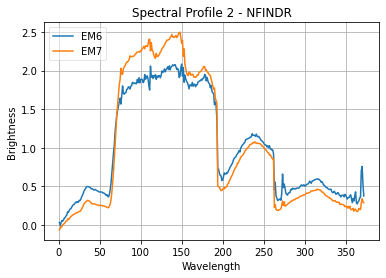

Abundance maps generation with NNLS


/Users/ckn/opt/anaconda3/lib/python3.8/site-packages/pysptools/abundance_maps/amaps_int.py:127: UserWarning: In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns
  warnings.warn('In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns')


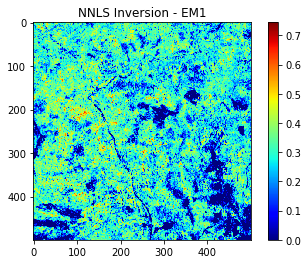

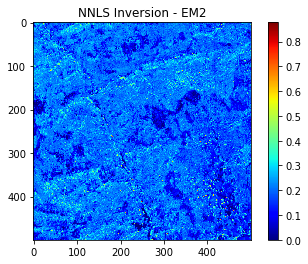

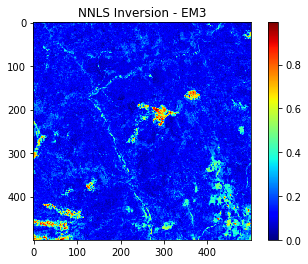

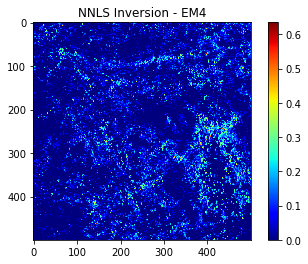

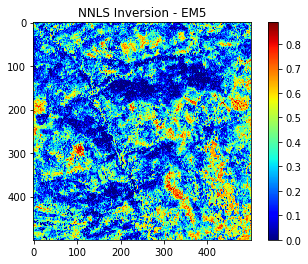

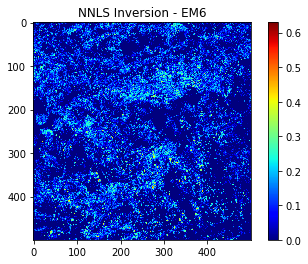

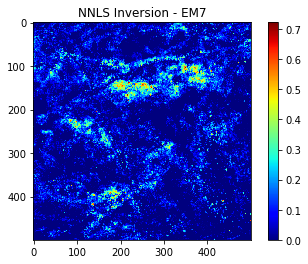

<Figure size 432x288 with 0 Axes>

In [46]:
# N-Finder
ori_nfindr = get_endmembers_NFINDR(r1_reg)
on_am = gen_abundance_maps(r1_reg, ori_nfindr)
ori_nfindr = {"ori_nfindr": ori_nfindr}
scipy.io.savemat("ori_nfindr.mat", ori_nfindr)

Endmembers extraction with FIPPI


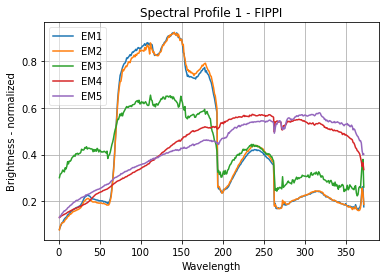

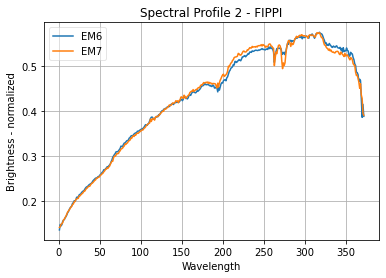

Abundance maps generation with NNLS


/Users/ckn/opt/anaconda3/lib/python3.8/site-packages/pysptools/abundance_maps/amaps_int.py:127: UserWarning: In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns
  warnings.warn('In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns')


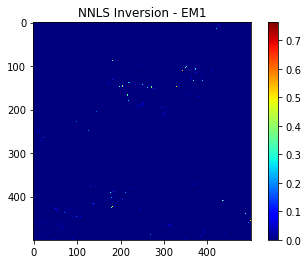

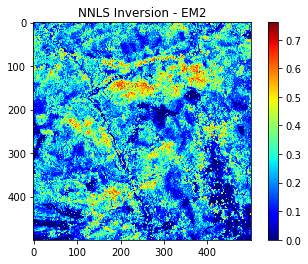

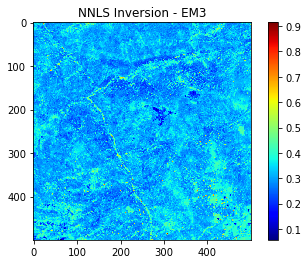

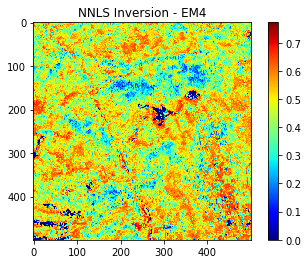

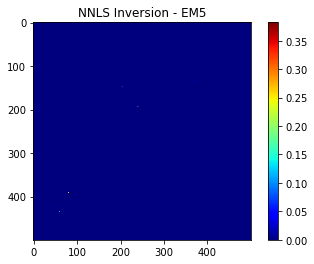

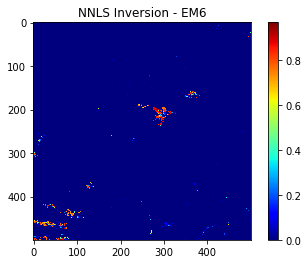

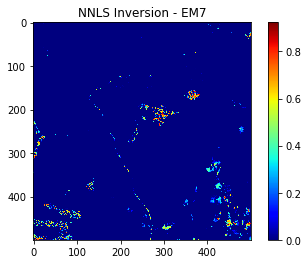

<Figure size 432x288 with 0 Axes>

In [31]:
# FIPPI
ori_fippi = get_endmembers_FIPPI(r1_reg)
of_am = gen_abundance_maps(r1_reg, ori_fippi)
#ori_fippi = {"ori_fippi": ori_fippi}
#scipy.io.savemat("ori_fippi.mat", ori_fippi)

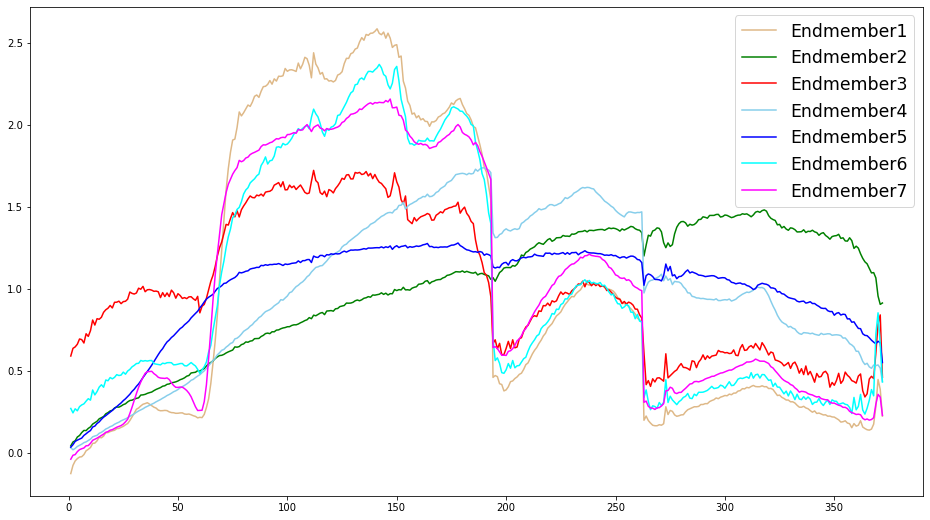

In [52]:
ori_atgp = scipy.io.loadmat('ori_atgp.mat')
ori_atgp = ori_atgp['ori_atgp']

plt.figure(figsize=(16,9))
sub_axix = filter(lambda x:x%200 == 0, range(1,373))
#plt.title('Spectral profiles')
plt.plot(range(1,373), ori_atgp[0,:], color='burlywood', label='Endmember1')
plt.plot(range(1,373), ori_atgp[1,:], color='green', label='Endmember2')
plt.plot(range(1,373), ori_atgp[2,:], color='red', label='Endmember3')
plt.plot(range(1,373), ori_atgp[3,:], color='skyblue', label='Endmember4')
plt.plot(range(1,373), ori_atgp[4,:], color='blue', label='Endmember5')
plt.plot(range(1,373), ori_atgp[5,:], color='cyan', label='Endmember6')
plt.plot(range(1,373), ori_atgp[6,:], color='magenta', label='Endmember7')


plt.legend(fontsize = 'xx-large', loc = 1) # 显示图例

#plt.xlabel('spectral bands')
#plt.ylabel('reflectance')
plt.show()

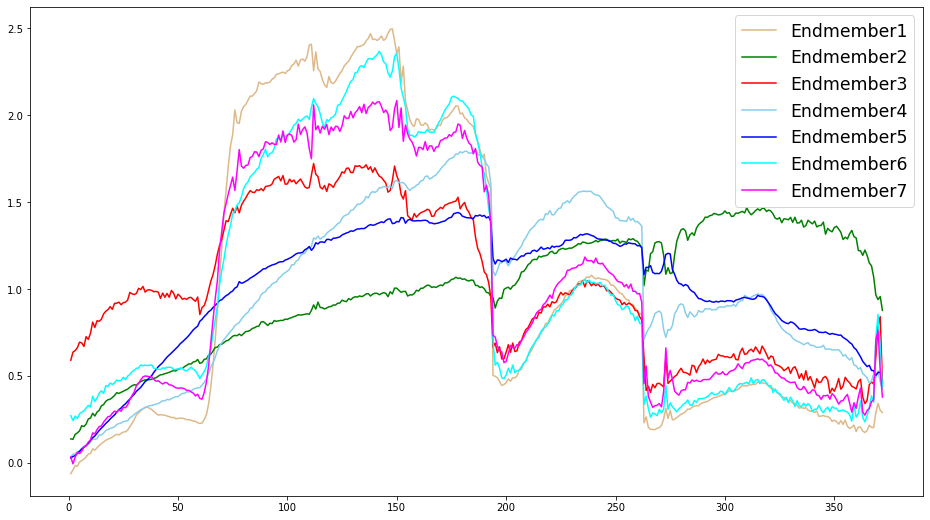

In [51]:
ori_nfindr = scipy.io.loadmat('ori_nfindr.mat')
ori_nfindr = ori_nfindr['ori_nfindr']

plt.figure(figsize=(16,9))
sub_axix = filter(lambda x:x%200 == 0, range(1,373))
#plt.title('Spectral profiles')
plt.plot(range(1,373), ori_nfindr[6,:], color='burlywood', label='Endmember1')
plt.plot(range(1,373), ori_nfindr[2,:], color='green', label='Endmember2')
plt.plot(range(1,373), ori_nfindr[1,:], color='red', label='Endmember3')
plt.plot(range(1,373), ori_nfindr[0,:], color='skyblue', label='Endmember4')
plt.plot(range(1,373), ori_nfindr[4,:], color='blue', label='Endmember5')
plt.plot(range(1,373), ori_nfindr[3,:], color='cyan', label='Endmember6')
plt.plot(range(1,373), ori_nfindr[5,:], color='magenta', label='Endmember7')


plt.legend(fontsize = 'xx-large', loc = 1) # 显示图例

#plt.xlabel('spectral bands')
#plt.ylabel('reflectance')
plt.show()

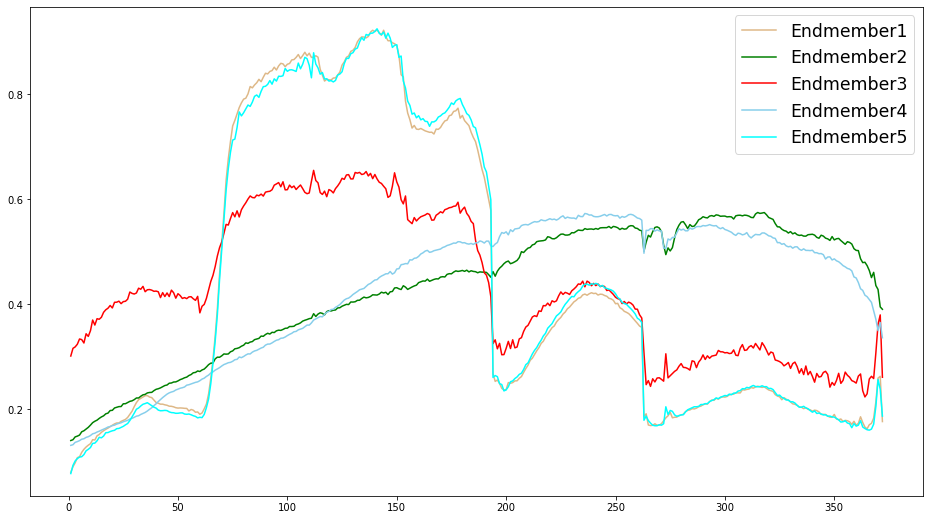

In [55]:
plt.figure(figsize=(16,9))
sub_axix = filter(lambda x:x%200 == 0, range(1,373))
#plt.title('Spectral profiles')
plt.plot(range(1,373), ori_fippi[0,:], color='burlywood', label='Endmember1')
plt.plot(range(1,373), ori_fippi[6,:], color='green', label='Endmember2')
plt.plot(range(1,373), ori_fippi[2,:], color='red', label='Endmember3')
plt.plot(range(1,373), ori_fippi[3,:], color='skyblue', label='Endmember4')
#plt.plot(range(1,373), ori_fippi[5,:], color='blue', label='Endmember5')
plt.plot(range(1,373), ori_fippi[1,:], color='cyan', label='Endmember5')
#plt.plot(range(1,373), ori_fippi[4,:], color='magenta', label='Endmember7')


plt.legend(fontsize = 'xx-large', loc = 1) # 显示图例

#plt.xlabel('spectral bands')
#plt.ylabel('reflectance')
plt.show()

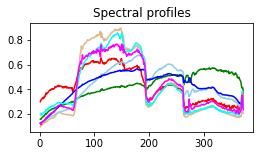

In [23]:
ori_nfindr = scipy.io.loadmat('ori_nfindr.mat')
ori_nfindr = ori_nfindr['ori_nfindr']

plt.figure(figsize=(4,2))
sub_axix = filter(lambda x:x%200 == 0, range(1,373))
plt.title('Spectral profiles')
plt.plot(range(1,373), ori_nfindr[6,:], color='burlywood', label='Endmember1')
plt.plot(range(1,373), ori_nfindr[2,:], color='green', label='Endmember2')
plt.plot(range(1,373), ori_nfindr[1,:], color='red', label='Endmember3')
plt.plot(range(1,373), ori_nfindr[0,:], color='skyblue', label='Endmember4')
plt.plot(range(1,373), ori_nfindr[4,:], color='blue', label='Endmember5')
plt.plot(range(1,373), ori_nfindr[3,:], color='cyan', label='Endmember6')
plt.plot(range(1,373), ori_nfindr[5,:], color='magenta', label='Endmember7')


#plt.legend() # 显示图例

#plt.xlabel('spectral bands')
#plt.ylabel('reflectance')
plt.show()